<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


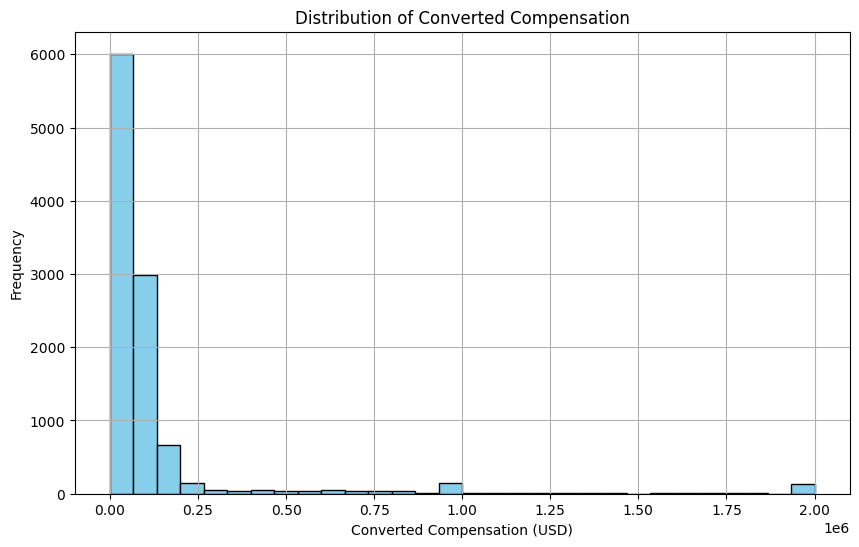

In [11]:
import matplotlib.pyplot as plt

# Plotting the distribution curve
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


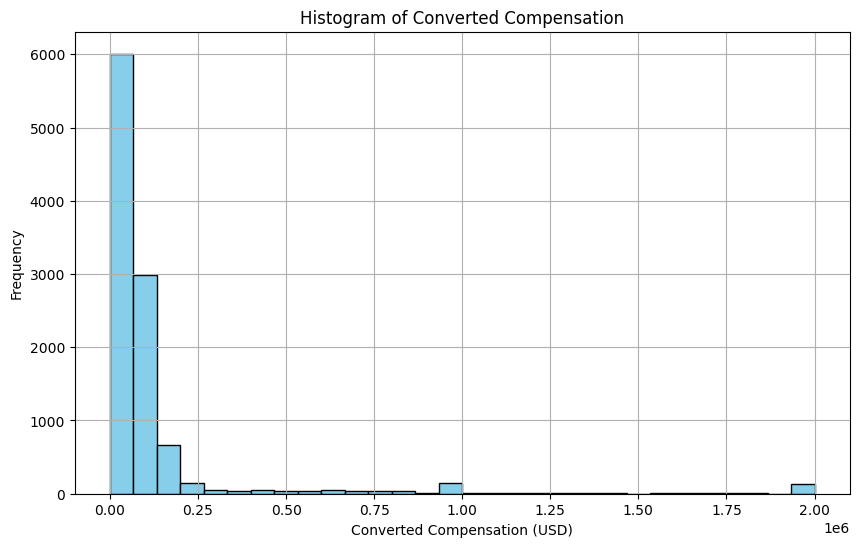

In [12]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [12]:
median_salary = df['ConvertedComp'].median()

# Print the median salary
print("Median Salary (USD):", median_salary)

Median Salary (USD): 57745.0


How many responders identified themselves only as a **Man**?


In [13]:
man_only_count = df[df['Gender'] == 'Man']['Gender'].count()

# Print the count of responders
print("Number of responders who identified only as a Man:", man_only_count)


Number of responders who identified only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
woman_df = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for responders identified as Woman
median_woman_salary = woman_df['ConvertedComp'].median()

# Print the median ConvertedComp for Woman responders
print("Median ConvertedComp for responders identified as Woman:", median_woman_salary)


Median ConvertedComp for responders identified as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
age_summary = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])

# Print the five-number summary
print("Five-Number Summary for Age:")
print("Minimum Age:", age_summary['min'])
print("First Quartile (Q1):", age_summary['25%'])
print("Median (Q2):", age_summary['50%'])
print("Third Quartile (Q3):", age_summary['75%'])
print("Maximum Age:", age_summary['max'])

Five-Number Summary for Age:
Minimum Age: 16.0
First Quartile (Q1): 25.0
Median (Q2): 29.0
Third Quartile (Q3): 35.0
Maximum Age: 99.0


Plot a histogram of the column `Age`.


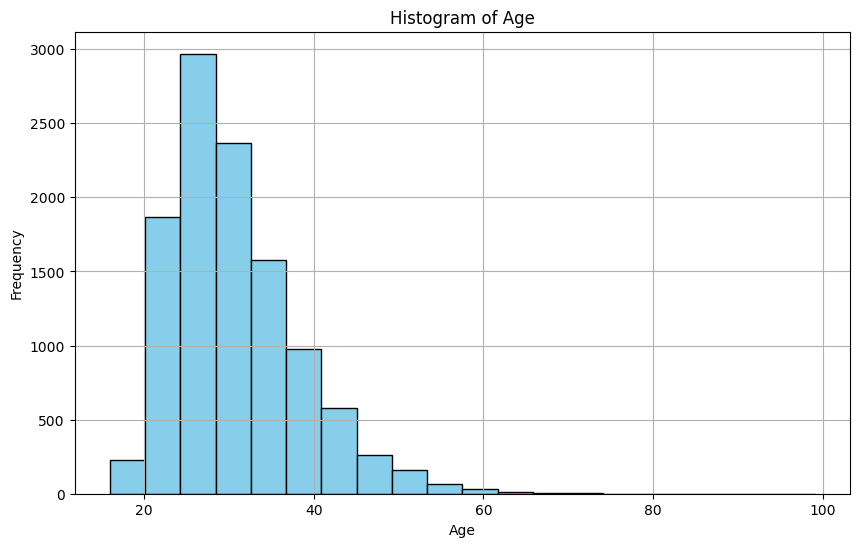

In [23]:
import matplotlib.pyplot as plt

# Plotting the histogram for the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


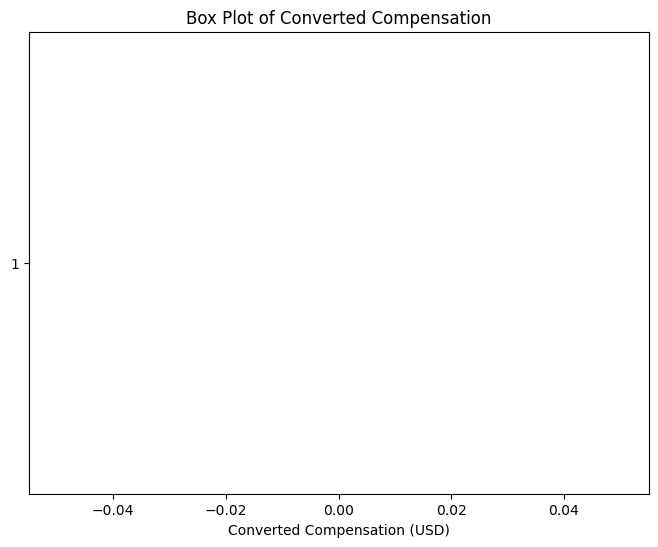

In [24]:
import matplotlib.pyplot as plt

# Create a box plot for the 'ConvertedComp' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['ConvertedComp'], vert=False)
plt.xlabel('Converted Compensation (USD)')
plt.title('Box Plot of Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [17]:
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the Interquartile Range (IQR)
print("Interquartile Range (IQR) for ConvertedComp:", IQR)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [18]:
# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

# Print the upper and lower bounds
print("Upper Bound for Outliers:", upper_bound)
print("Lower Bound for Outliers:", lower_bound)

Upper Bound for Outliers: 209698.0
Lower Bound for Outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [19]:
# Count the number of outliers
outliers_count = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]['ConvertedComp'].count()

# Print the number of outliers
print("Number of outliers in ConvertedComp column:", outliers_count)

Number of outliers in ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [20]:
# Create a new DataFrame by removing outliers
new_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the new DataFrame to verify outlier removal
print("Shape of original DataFrame:", df.shape)
print("Shape of new DataFrame after outlier removal:", new_df.shape)

Shape of original DataFrame: (11398, 85)
Shape of new DataFrame after outlier removal: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [22]:
correlation_matrix = df.corr(numeric_only=True)

# Get the correlation of 'Age' with all other numerical columns
age_corr = correlation_matrix['Age']

# Print the correlation of 'Age' with other numerical columns
print("Correlation of 'Age' with other numerical columns:")
print(age_corr)

Correlation of 'Age' with other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


In [25]:
median_converted_comp = new_df['ConvertedComp'].median()

# Print the median ConvertedComp after removing outliers
print("Median ConvertedComp after removing outliers:", median_converted_comp)

Median ConvertedComp after removing outliers: 52704.0
